 # A network intrusion detector

## Task: 
* Build a predictive model capable of distinguishing between 'bad' connections, called intrusions or attacks, and 'good' normal connections. 
* Differentiate between both the normal traffic and among distinct types of attack (predict the actual types (22 types) of attack).

## Data
* The dataset was acquired, by Lincoln Labs, for nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN. [This Link](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) is for more information about the data. 

## Workflow
* Start by visualizing the data to understand the data
* Use PCA and TNSE to do data for feature reduction and plot the data in 2D. This might help to show the data clusters and anomalies
* Perform feature engineering
* Use Random Forest, SVM, and ANN algorithms for binary classifiers to differentiate  'normal and 'attack' connections
* Predict the actual types of attack using multiple classifiers with Random Forest, SVM, and ANN algorithms

## Results
* The ML models showed very promising results on the test datasets. They can even detect some minor class attack. Overall, the Random forest model performed better compared to the two others in the dataset.

# Code
### Section
[1. Exploratory data analysis](#sect1)\
[2. Feature engineering](#sect2)\
[3. PCA and TSNE for visualizing the data](#sect3)\
[4. Differentiate 'normal' connections from 'attack' connections](#sect4)\
[5. Predict the actual label: Normal and distinct types of attack](#sect5)\

<a id='sect1'></a>

## 1. Exploratory data analysis

In [307]:
# Import libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [308]:
# load the data
df = pd.read_csv('kddcup.data_10_percent')

In [309]:
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

In [312]:
# concise summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
181,494020.0,3025.616054,988219.101229,0.0,45.00,520.0,1032.00,693375640.0
5450,494020.0,868.523151,33040.034049,0.0,0.00,0.0,0.00,5155468.0
0.1,494020.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
0.2,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
0.3,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
0.4,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
0.5,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
1,494020.0,0.148245,0.355343,0.0,0.00,0.0,0.00,1.0
0.6,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0


In [399]:
df.nunique()

0            2495
181          3300
5450        10725
0.1             2
0.2             3
0.3             4
0.4            22
0.5             6
1               2
0.6            23
0.7             2
0.8             3
0.9            20
0.10           18
0.11            3
0.12            7
0.13            1
0.14            1
0.15            2
8             490
8.1           470
0.00           92
0.00.1         51
0.00.2         77
0.00.3         51
1.00           99
0.00.4         78
0.00.5         64
9             256
9.1           256
1.00.1        101
0.00.6        101
0.11.1        101
0.00.7         65
0.00.8        100
0.00.9         72
0.00.10       101
0.00.11       101
target         23
icmp            2
tcp             2
udp             2
ecr_i           2
http            2
other           2
private         2
REJ             2
S0              2
SF              2
other_sf        2
dtype: int64

In [313]:
# Check unique values for target column
df['normal.'].nunique()

23

In [314]:
# missing data
df.isnull().sum()

0          0
tcp        0
http       0
SF         0
181        0
5450       0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
8          0
8.1        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
9          0
9.1        0
1.00.1     0
0.00.6     0
0.11.1     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
normal.    0
dtype: int64

In [315]:
# column names
df.columns

Index(['0', 'tcp', 'http', 'SF', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', 'normal.'],
      dtype='object')

In [316]:
# the 'tcp' columns
df['tcp'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

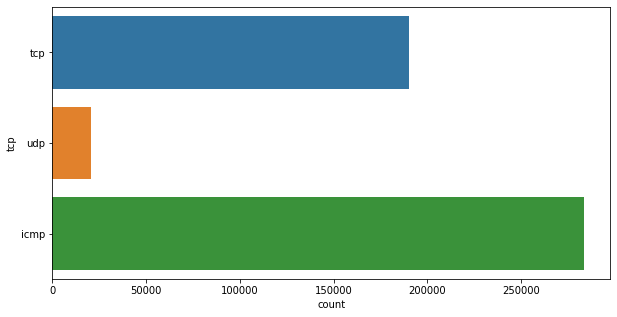

In [317]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = df, y = 'tcp')

In [318]:
# the 'tcp' columns

df['http'].value_counts()

ecr_i          281400
private        110893
http            64292
smtp             9723
other            7237
domain_u         5863
ftp_data         4721
eco_i            1642
ftp               798
finger            670
urp_i             538
telnet            513
ntp_u             380
auth              328
pop_3             202
time              157
csnet_ns          126
remote_job        120
imap4             117
gopher            117
discard           116
domain            116
systat            115
iso_tsap          115
shell             112
echo              112
rje               111
sql_net           110
whois             110
printer           109
courier           108
nntp              108
sunrpc            107
mtp               107
netbios_ssn       107
bgp               106
vmnet             106
uucp              106
klogin            106
uucp_path         106
nnsp              105
supdup            105
ssh               105
hostnames         104
login             104
daytime   

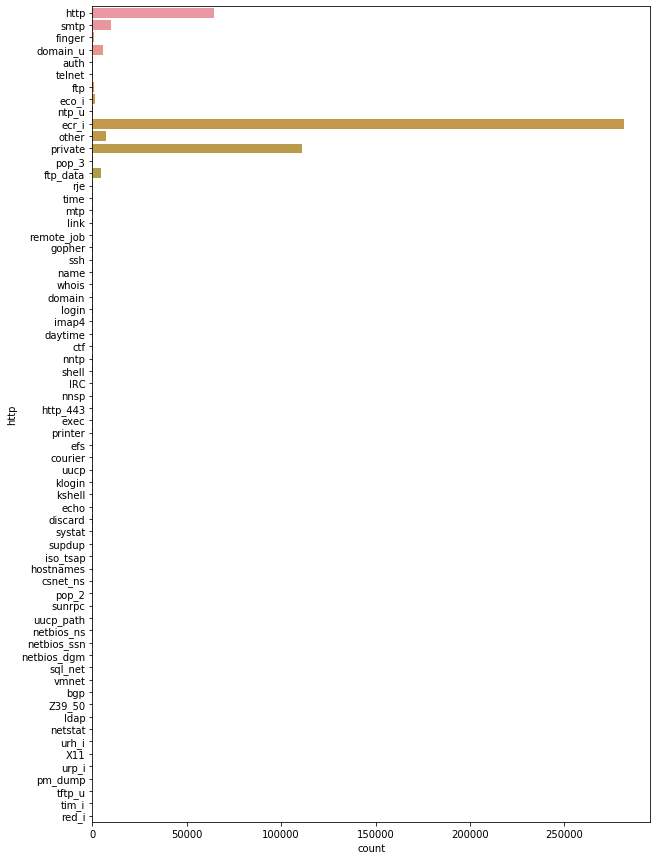

In [319]:
fig = plt.figure(figsize=(10,15))
sns.countplot(data = df, y = 'http')

In [320]:
# The 'SF' column
df['SF'].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

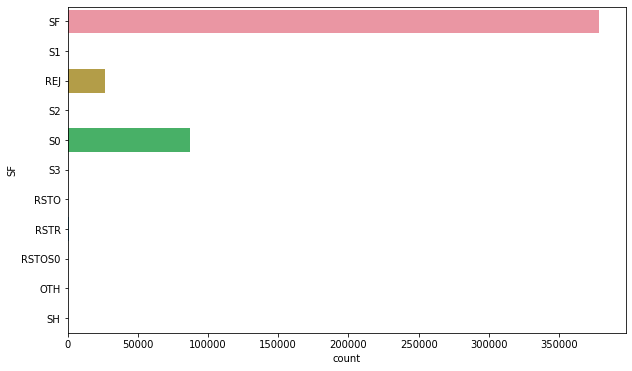

In [321]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data = df, y = 'SF')

#### target columns

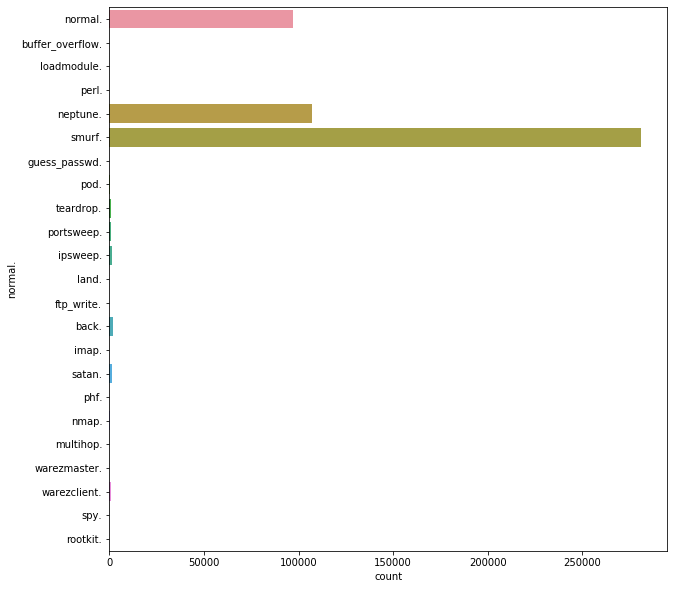

In [323]:
fig = plt.figure(figsize=(10,10))
sns.countplot(data = df, y = 'normal.')

#### Note: There are three major types of attack

<a id='sect2'></a>

## 2. Feature engineering

In [325]:
df.columns

Index(['0', 'tcp_', 'http_', 'SF_', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', 'target'],
      dtype='object')

In [326]:
# Change the column names
df.columns = ['0', 'tcp_', 'http_', 'SF_', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', 'target']

### Get dummy for 'tcp' column

In [327]:
# Get dummy the 'tcp' column
dummy_tcp=pd.get_dummies(df['tcp_'])

# Concate to the dummy variables to df
df=pd.concat([df, dummy_tcp], axis=1)
df.head()

# drop the 'tcp' column
df = df.drop('tcp_',axis = 1)

In [328]:
df.head(2)

,0,http_,SF_,181,5450,0.1,0.2,0.3,0.4,0.5,...,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,target,icmp,tcp,udp
0,0,http,SF,239,486,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
1,0,http,SF,235,1337,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0


### Get dummy for 'http' column

In [329]:
# Set number of rows displayed
pd.set_option('display.max_rows', 500)

In [330]:
# The most number values of the columns are 'ecr_i', 'private', and 'http'. 
# Combine all others values to 'other'
list_http = ['ecr_i', 'private', 'http']
df['http_'] = df['http_'].apply(lambda x: 'other' if x not in list_http else x)

In [331]:
df['http_'].value_counts()

ecr_i      281400
private    110893
http        64292
other       37435
Name: http_, dtype: int64

In [332]:
# Get dummy the 'http' column
dummy_http=pd.get_dummies(df['http_'])

# Concate to the dummy variables to df
df=pd.concat([df, dummy_http], axis=1)

# drop the 'tcp' column
df = df.drop('http_',axis = 1)
df.head()

,0,SF_,181,5450,0.1,0.2,0.3,0.4,0.5,1,...,0.00.10,0.00.11,target,icmp,tcp,udp,ecr_i,http,other,private
0,0,SF,239,486,0,0,0,0,0,1,...,0.0,0.0,normal.,0,1,0,0,1,0,0
1,0,SF,235,1337,0,0,0,0,0,1,...,0.0,0.0,normal.,0,1,0,0,1,0,0
2,0,SF,219,1337,0,0,0,0,0,1,...,0.0,0.0,normal.,0,1,0,0,1,0,0
3,0,SF,217,2032,0,0,0,0,0,1,...,0.0,0.0,normal.,0,1,0,0,1,0,0
4,0,SF,217,2032,0,0,0,0,0,1,...,0.0,0.0,normal.,0,1,0,0,1,0,0


### Get dummy for 'SF' column

In [333]:
df['SF_'].value_counts()

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: SF_, dtype: int64

In [334]:
# The most number values of the columns are 'SF', 'SO', and 'REJ'. 
# Combine all others values to 'other'
list_SF = ['SF', 'S0', 'REJ']
df['SF_'] = df['SF_'].apply(lambda x: 'other_sf' if x not in list_SF else x)

In [335]:
df['SF_'].value_counts()

SF          378439
S0           87007
REJ          26875
other_sf      1699
Name: SF_, dtype: int64

In [336]:
# Get dummy the 'SF' column
dummy_SF=pd.get_dummies(df['SF_'])

# Concate to the dummy variables to df
df=pd.concat([df, dummy_SF], axis=1)

# drop the 'tcp' column
df = df.drop('SF_',axis = 1)
df.head()

,0,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,...,tcp,udp,ecr_i,http,other,private,REJ,S0,SF,other_sf
0,0,239,486,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,235,1337,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,219,1337,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,0,217,2032,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [337]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
181,494020.0,3025.616054,988219.101229,0.0,45.00,520.0,1032.00,693375640.0
5450,494020.0,868.523151,33040.034049,0.0,0.00,0.0,0.00,5155468.0
0.1,494020.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
0.2,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
0.3,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
0.4,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
0.5,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
1,494020.0,0.148245,0.355343,0.0,0.00,0.0,0.00,1.0
0.6,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0


### Data preprocessing

In [338]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [339]:
# Make a copy or check point
df_pre = df.copy()

In [340]:
# encode the taget column
# normal connects: '0', attack: '1'. 
df_pre['target'] = df_pre['target'].apply(lambda x: 0 if x == 'normal.' else 1)

In [341]:
df_pre['target'].value_counts()

1    396743
0     97277
Name: target, dtype: int64

In [342]:
X = df_pre.drop('target',axis = 1)
y = df_pre['target'].values

In [343]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

<a id='sect3'></a>

## 3. PCA and TSNE for visualizing the data

#### Using PCA to performe feature reduction on the data

In [344]:
# Using PCA to performe dimensional reduction for the data
from sklearn.decomposition import PCA

In [345]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [346]:
pca = PCA(n_components=2)
pca = pca.fit(X)
X_pca = pca.transform(X)
X0_pca = X_pca[y==0]
X1_pca = X_pca[y==1]

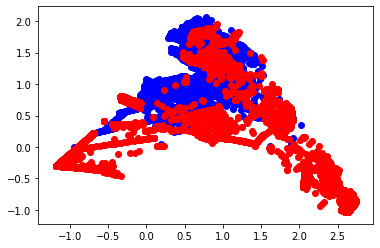

In [347]:
# Plot the data
fig, ax = plt.subplots()

ax.scatter(X0_pca[:,0],X0_pca[:,1],c='b')
ax.scatter(X1_pca[:,0],X1_pca[:,1],c='r')

#### Note: The PCA data does not totaly distinguish normal and attack connections

#### Use TSNE

In [348]:
# TSNE task is expensive so we here use only 10% of observations of the dataset 
df_tsne = df.sample(frac=0.1, replace=True)
df_tsne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49402 entries, 307287 to 270358
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         49402 non-null  int64  
 1   181       49402 non-null  int64  
 2   5450      49402 non-null  int64  
 3   0.1       49402 non-null  int64  
 4   0.2       49402 non-null  int64  
 5   0.3       49402 non-null  int64  
 6   0.4       49402 non-null  int64  
 7   0.5       49402 non-null  int64  
 8   1         49402 non-null  int64  
 9   0.6       49402 non-null  int64  
 10  0.7       49402 non-null  int64  
 11  0.8       49402 non-null  int64  
 12  0.9       49402 non-null  int64  
 13  0.10      49402 non-null  int64  
 14  0.11      49402 non-null  int64  
 15  0.12      49402 non-null  int64  
 16  0.13      49402 non-null  int64  
 17  0.14      49402 non-null  int64  
 18  0.15      49402 non-null  int64  
 19  8         49402 non-null  int64  
 20  8.1       49402 non-nu

In [349]:
X = df_tsne.drop('target',axis = 1)
y = df_tsne['target'].values

In [350]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [351]:
# Apply PCA first
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)

In [352]:
X_tsne

array([[-16.95373  , -23.577103 ],
       [-16.769793 , -23.73723  ],
       [-18.91607  ,  11.506796 ],
       ...,
       [ 20.060482 ,  -1.4850118],
       [ -5.433862 ,  54.599422 ],
       [ -1.6525536,  -3.995393 ]], dtype=float32)

In [355]:
df_tsne['target'].nunique()

21

In [353]:
yy = df_tsne['target'].values.reshape(len(X_tsne))

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


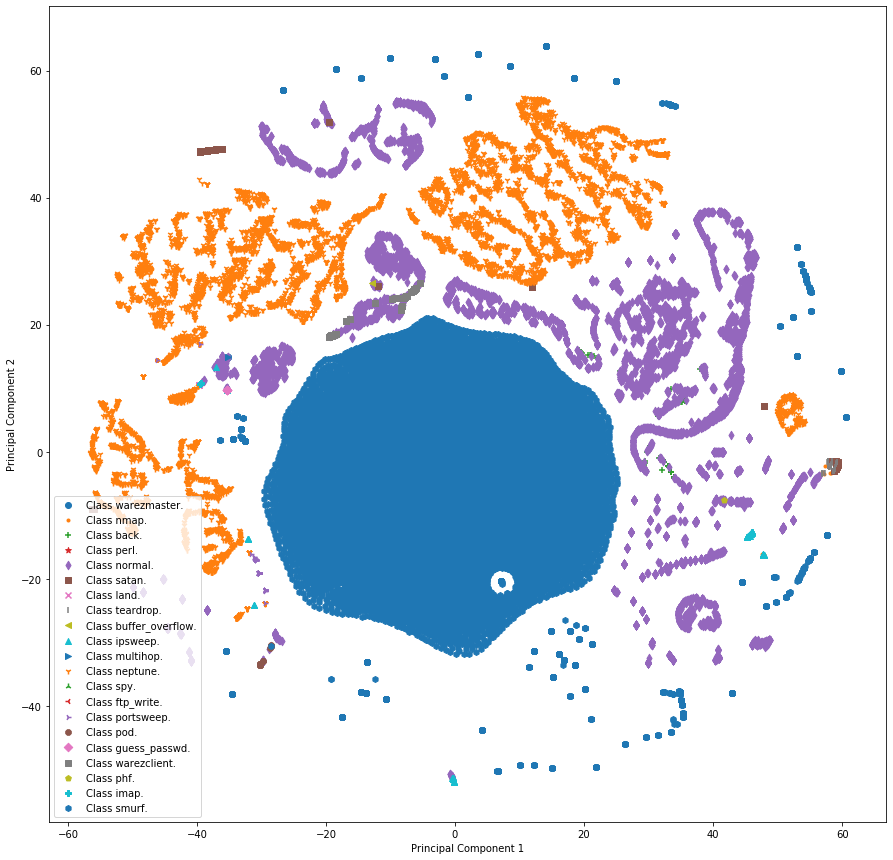

In [356]:
fig, ax = plt.subplots(figsize=(15,15))
for i, c in enumerate(set(yy)):
    subXX = X_tsne[yy==c]
    ax.scatter(subXX[:, 0], subXX[:, 1], marker="o.+*dsx|<^>12348D,pPhHX"[i], label="Class {}".format(c))
ax.legend()
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
fig.show()

#### Note: The visulasation of TSNE data is much better than that of PCA in showing data clusters (normal and attack connections)

<a id='sect4'></a>

## 4. Differentiate 'normal' connections from 'attack' connections

In [357]:
# Split the data in train and test sets
from sklearn.model_selection import train_test_split
X = df_pre.drop('target',axis = 1)
y = df_pre['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [358]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

### Random forest model

In [359]:
# Train model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)

In [360]:
# predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix

pred_rfc = rfc.predict(X_test)

# evaluate the model
print(classification_report(y_test,pred_rfc))
print()
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29341
           1       1.00      1.00      1.00    118865

    accuracy                           1.00    148206
   macro avg       1.00      1.00      1.00    148206
weighted avg       1.00      1.00      1.00    148206


[[ 29332      9]
 [    37 118828]]


#### Note: The random forest model works well!

In [361]:
# Feature importance
fea_imp = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


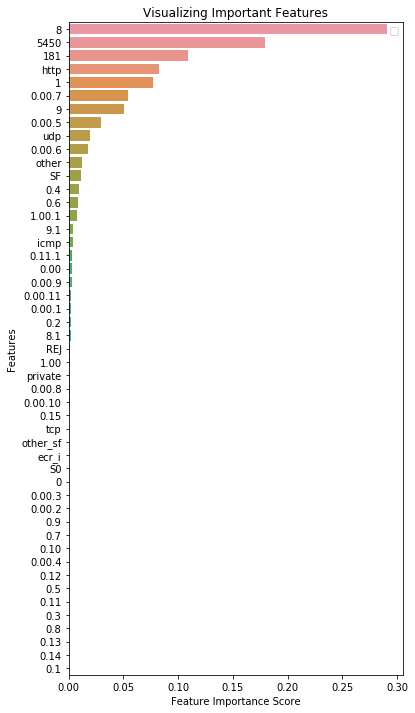

In [362]:
fig = plt.figure(figsize = (6,12))
sns.barplot(x=fea_imp, y=fea_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### We're gonna drop the unimportance feature

### SVM model

In [363]:
df_pre.columns

Index(['0', '181', '5450', '0.1', '0.2', '0.3', '0.4', '0.5', '1', '0.6',
       '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15',
       '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3', '1.00', '0.00.4',
       '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1', '0.00.7', '0.00.8',
       '0.00.9', '0.00.10', '0.00.11', 'target', 'icmp', 'tcp', 'udp', 'ecr_i',
       'http', 'other', 'private', 'REJ', 'S0', 'SF', 'other_sf'],
      dtype='object')

In [368]:
df_red = df_pre[['181', '5450', '0.2', '0.4', '1', '0.6','8', '8.1', '0.00', 
                '0.00.1','0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1', 
                '0.00.7','0.00.9', '0.00.11', 'target', 'icmp', 'udp', 'http', 
                'other', 'REJ', 'SF']]

In [369]:
# Split the data in train and test sets
X = df_red.drop('target',axis = 1)
y = df_red['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [370]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [371]:
# Train the model
from sklearn.svm import SVC
svm = SVC().fit(X_train,y_train)

In [372]:
# Fit and evaluate
# predict

from sklearn.metrics import classification_report, confusion_matrix
pred_svm = svm.predict(X_test)

# evaluate the model
print(classification_report(y_test,pred_svm))
print()
print(confusion_matrix(y_test,pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29341
           1       1.00      1.00      1.00    118865

    accuracy                           1.00    148206
   macro avg       1.00      1.00      1.00    148206
weighted avg       1.00      1.00      1.00    148206


[[ 29277     64]
 [    82 118783]]


#### Note: The svm model works also well!

### Artifacial neural network

In [376]:
X.shape

(494020, 25)

In [374]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [375]:
# create an earlystopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [378]:
# create a model with Dropout
ann = Sequential()

ann.add(Dense(units = 25, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 12, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 6, activation = 'relu'))
ann.add(Dropout(0.5))

ann.add(Dense(units = 1, activation = 'sigmoid'))
ann.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model 
ann.fit(X_train,y_train,
         epochs = 100,
         validation_data=(X_test, y_test), verbose=1,
         callbacks=[early_stop])

Epoch 1/100
10807/10807 [==============================] - 17s 2ms/step - loss: 0.1015 - val_loss: 0.0360
Epoch 2/100
10807/10807 [==============================] - 17s 2ms/step - loss: 0.0685 - val_loss: 0.0336
Epoch 3/100
10807/10807 [==============================] - 17s 2ms/step - loss: 0.0667 - val_loss: 0.0322
Epoch 4/100
10807/10807 [==============================] - 18s 2ms/step - loss: 0.0660 - val_loss: 0.0325
Epoch 5/100
10807/10807 [==============================] - 18s 2ms/step - loss: 0.0660 - val_loss: 0.0319
Epoch 6/100
10807/10807 [==============================] - 17s 2ms/step - loss: 0.0651 - val_loss: 0.0320
Epoch 7/100
10807/10807 [==============================] - 16s 1ms/step - loss: 0.0654 - val_loss: 0.0317
Epoch 8/100
10807/10807 [==============================] - 16s 1ms/step - loss: 0.0646 - val_loss: 0.0316
Epoch 9/100
10807/10807 [==============================] - 16s 1ms/step - loss: 0.0650 - val_loss: 0.0319
Epoch 10/100
10807/10807 [====================

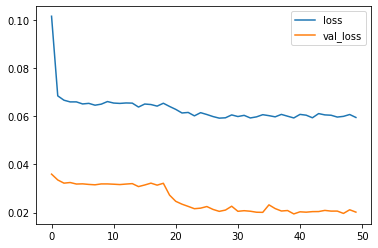

In [379]:
# Plot the model loss
model_loss = pd.DataFrame(ann.history.history)
model_loss.plot()

In [380]:
# predict
pred_ann = ann.predict_classes(X_test)

# evaluate
print(classification_report(y_test,pred_ann))
print()
print(confusion_matrix(y_test,pred_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29341
           1       1.00      1.00      1.00    118865

    accuracy                           1.00    148206
   macro avg       1.00      1.00      1.00    148206
weighted avg       1.00      1.00      1.00    148206


[[ 29316     25]
 [   105 118760]]


#### The ANN model is good. 

<a id='sect5'></a>

# 5. Predict the actual label: Normal and distinct types of attack

## Random forest for multiple classification

In [381]:
# Create a data set with the important features
df_m = df[['181', '5450', '0.2', '0.4', '1', '0.6','8', '8.1', '0.00', 
                '0.00.1','0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1', 
                '0.00.7','0.00.9', '0.00.11', 'target', 'icmp', 'udp', 'http', 
                'other', 'REJ', 'SF']]

In [382]:
#Creating the dependent variable class
factor = pd.factorize(df_m['target'])
df_m.target = factor[0]
definitions = factor[1]
print(df_m.target.head())
print()
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Index(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
       'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.',
       'rootkit.'],
      dtype='object')


/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [383]:
df_m.target.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [384]:
X = df_m.drop('target',axis = 1)
y = df_m['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [385]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [386]:
# Train the model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [387]:
# predict
pred_mclass = classifier.predict(X_test)

In [388]:
#Reverse factorize (converting y_pred from 0s, 1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(23),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
pred_mclass = np.vectorize(reversefactor.get)(pred_mclass)
# Making the Confusion Matrix
print(pd.crosstab(y_test, pred_mclass, rownames=['Actual'], colnames=['Predicted Species']))

Predicted Species  back.  buffer_overflow.  guess_passwd.  imap.  ipsweep.  \
Actual                                                                       
back.                656                 0              0      0         0   
buffer_overflow.       0                 6              0      0         0   
ftp_write.             0                 0              0      0         0   
guess_passwd.          0                 0             14      0         0   
imap.                  0                 0              0      3         0   
ipsweep.               0                 0              0      0       372   
land.                  0                 0              0      0         0   
loadmodule.            0                 0              0      0         0   
neptune.               0                 0              0      0         0   
nmap.                  0                 0              0      0         0   
normal.                0                 0              0      0

In [389]:
# evaluate
print(classification_report(y_test,pred_mclass))
print()
print(confusion_matrix(y_test,pred_mclass))

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       659
buffer_overflow.       1.00      0.86      0.92         7
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      0.93      0.97        15
           imap.       1.00      0.60      0.75         5
        ipsweep.       1.00      0.99      1.00       374
           land.       1.00      0.83      0.91         6
     loadmodule.       0.00      0.00      0.00         3
       multihop.       0.00      0.00      0.00         0
        neptune.       1.00      1.00      1.00     31802
           nmap.       0.97      0.94      0.95        66
         normal.       1.00      1.00      1.00     29341
            phf.       1.00      1.00      1.00         1
            pod.       0.99      0.98      0.98        91
      portsweep.       1.00      0.99      0.99       338
        rootkit.       0.00      0.00      0.00         5
          sat

#### the results looks good

## ANN for multiple classification

In [390]:
# Create a data set with the important features
df_m = df[['181', '5450', '0.2', '0.4', '1', '0.6','8', '8.1', '0.00', 
                '0.00.1','0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1', 
                '0.00.7','0.00.9', '0.00.11', 'target', 'icmp', 'udp', 'http', 
                'other', 'REJ', 'SF']]

#Creating the dependent variable class
factor = pd.factorize(df_m['target'])
df_m.target = factor[0]
definitions = factor[1]
print(df_m.target.head())
print()
print(definitions)

###
X = df_m.drop('target',axis = 1)
y = df_m['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

###

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Index(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
       'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.',
       'rootkit.'],
      dtype='object')


In [391]:
# One-Hot categorical encoding of the labels is to use the built-in function.
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [392]:
X_train.shape

(345814, 25)

In [194]:
y_train.shape

(345814, 23)

In [393]:
# create an earlystopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# create a model with Dropout
ann_m = Sequential()

ann_m.add(Dense(units = 25, activation = 'relu'))
ann_m.add(Dropout(0.5))
#ann_m.add(Dense(units = 49, activation = 'relu'))
#ann_m.add(Dropout(0.5))

ann_m.add(Dense(units = 23, activation = 'softmax'))

ann_m.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Train the model 
ann_m.fit(X_train,y_train,
         epochs = 50,
         validation_data=(X_test, y_test), verbose=2,
         callbacks=[early_stop])

Epoch 1/50
10807/10807 - 13s - loss: 0.0987 - accuracy: 0.9783 - val_loss: 0.0273 - val_accuracy: 0.9917
Epoch 2/50
10807/10807 - 13s - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0186 - val_accuracy: 0.9931
Epoch 3/50
10807/10807 - 18s - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0173 - val_accuracy: 0.9959
Epoch 4/50
10807/10807 - 17s - loss: 0.0251 - accuracy: 0.9926 - val_loss: 0.0171 - val_accuracy: 0.9979
Epoch 5/50
10807/10807 - 14s - loss: 0.0226 - accuracy: 0.9935 - val_loss: 0.0186 - val_accuracy: 0.9981
Epoch 6/50
10807/10807 - 13s - loss: 0.0217 - accuracy: 0.9939 - val_loss: 0.0210 - val_accuracy: 0.9982
Epoch 7/50
10807/10807 - 13s - loss: 0.0205 - accuracy: 0.9944 - val_loss: 0.0236 - val_accuracy: 0.9983
Epoch 8/50
10807/10807 - 12s - loss: 0.0196 - accuracy: 0.9947 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 9/50
10807/10807 - 12s - loss: 0.0188 - accuracy: 0.9948 - val_loss: 0.0276 - val_accuracy: 0.9985
Epoch 00009: early stopping


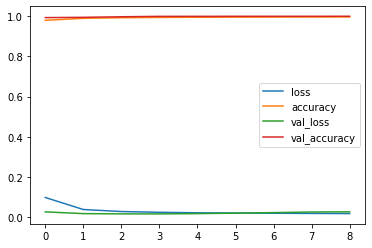

In [394]:
# Plot the loss of the model
model_loss = pd.DataFrame(ann_m.history.history)
model_loss.plot()

In [395]:
# predict
from sklearn.metrics import accuracy_score

pred_ann_m = ann_m.predict(X_test)
pred_ann_m = np.argmax(pred_ann_m, axis=1)
pred_ann_m
accuracy_score(np.argmax(y_test, axis=1), pred_ann_m)

0.9985155796661404

In [396]:
# evaluate
print(classification_report(np.argmax(y_test, axis=1),pred_ann_m))
print()
print(confusion_matrix(np.argmax(y_test, axis=1),pred_ann_m))

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29341
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           4       1.00      1.00      1.00     31802
           5       1.00      1.00      1.00     84397
           6       0.00      0.00      0.00        15
           7       1.00      0.98      0.99        91
           8       1.00      0.99      1.00       294
           9       0.99      0.97      0.98       338
          10       0.93      0.97      0.95       374
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         2
          13       0.98      0.99      0.98       659
          14       0.00      0.00      0.00         5
          15       0.99      0.95      0.97       484
          16       0.00      0.00      0.00         1
          17       0.87      0.50      0.63        66
          19       0.00    